In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use("fivethirtyeight")

In [2]:
import yfinance as yf
import datetime as dt

stock="JKH-N0000.CM"
start=dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 7, 14)

df=yf.download(stock, start, end)


/tmp/ipython-input-2-1599667619.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,JKH-N0000.CM,JKH-N0000.CM,JKH-N0000.CM,JKH-N0000.CM,JKH-N0000.CM
Date,,,,,
2007-03-30,84.931496,85.479441,84.931496,84.931496,123534
2007-04-04,84.931496,84.931496,84.383550,84.931496,427260
2007-04-05,84.931496,84.931496,84.383550,84.931496,93950
2007-04-09,84.931496,84.931496,83.835605,84.931496,61677
2007-04-10,84.383568,84.794527,83.835622,84.383568,75304


In [4]:
df.shape

(4521, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4521 entries, 2007-03-30 to 2025-07-11
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, JKH-N0000.CM)   4521 non-null   float64
 1   (High, JKH-N0000.CM)    4521 non-null   float64
 2   (Low, JKH-N0000.CM)     4521 non-null   float64
 3   (Open, JKH-N0000.CM)    4521 non-null   float64
 4   (Volume, JKH-N0000.CM)  4521 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 211.9 KB


In [6]:
df.isnull().sum()

,,0
Price,Ticker,
Close,JKH-N0000.CM,0
High,JKH-N0000.CM,0
Low,JKH-N0000.CM,0
Open,JKH-N0000.CM,0
Volume,JKH-N0000.CM,0


In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,JKH-N0000.CM,JKH-N0000.CM,JKH-N0000.CM,JKH-N0000.CM,JKH-N0000.CM
count,4521.000000,4521.000000,4521.000000,4521.000000,4.521000e+03
mean,134.024475,135.087648,133.173492,134.250383,1.272040e+06
std,44.287063,44.493925,44.056027,44.285797,4.908563e+06
min,18.656309,19.454439,18.257242,18.756074,0.000000e+00
25%,122.111687,123.865784,121.095909,122.111687,5.181600e+04
50%,146.236893,147.324539,145.347015,146.335784,2.840780e+05
75%,160.572357,161.697649,159.664869,160.672723,8.443970e+05
max,217.531357,218.556422,218.043940,219.288648,1.495569e+08


In [8]:
df=df.reset_index()

In [9]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'JKH-N0000.CM'),
            (  'High', 'JKH-N0000.CM'),
            (   'Low', 'JKH-N0000.CM'),
            (  'Open', 'JKH-N0000.CM'),
            ('Volume', 'JKH-N0000.CM')],
           names=['Price', 'Ticker'])

In [10]:
df.to_csv("johnKeells.csv")


In [11]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = df['Date'], open = df['Open'],
                                    high = df['High'],
                                    low = df['Low'],
                                    close = df['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [12]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'JKH-N0000.CM'),
            (  'High', 'JKH-N0000.CM'),
            (   'Low', 'JKH-N0000.CM'),
            (  'Open', 'JKH-N0000.CM'),
            ('Volume', 'JKH-N0000.CM')],
           names=['Price', 'Ticker'])

In [13]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,JKH-N0000.CM,JKH-N0000.CM,JKH-N0000.CM,JKH-N0000.CM,JKH-N0000.CM
0,2007-03-30,84.931496,85.479441,84.931496,84.931496,123534
1,2007-04-04,84.931496,84.931496,84.383550,84.931496,427260
2,2007-04-05,84.931496,84.931496,84.383550,84.931496,93950
3,2007-04-09,84.931496,84.931496,83.835605,84.931496,61677
4,2007-04-10,84.383568,84.794527,83.835622,84.383568,75304


In [14]:
df=df.drop(['Date'], axis=1)


/tmp/ipython-input-14-1118183717.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [15]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,JKH-N0000.CM,JKH-N0000.CM,JKH-N0000.CM,JKH-N0000.CM,JKH-N0000.CM
0,84.931496,85.479441,84.931496,84.931496,123534
1,84.931496,84.931496,84.383550,84.931496,427260
2,84.931496,84.931496,84.383550,84.931496,93950
3,84.931496,84.931496,83.835605,84.931496,61677
4,84.383568,84.794527,83.835622,84.383568,75304


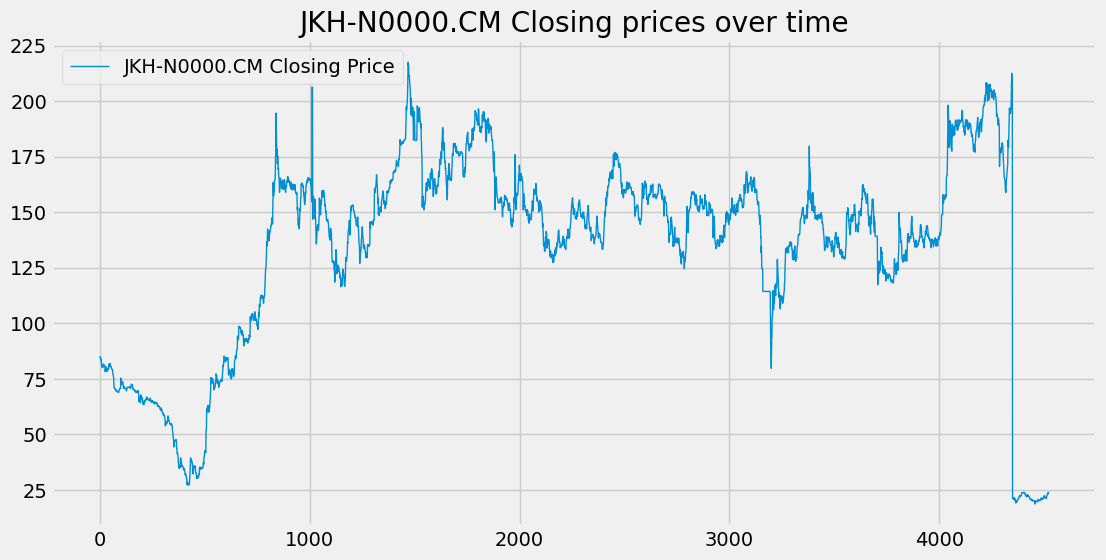

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label=f'{stock} Closing Price', linewidth=1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

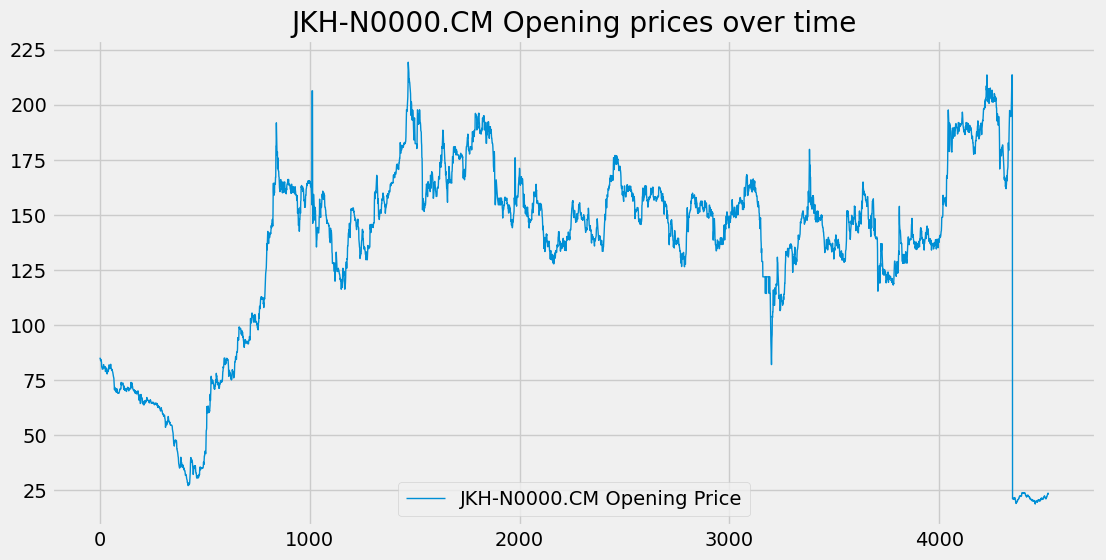

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label=f'{stock} Opening Price', linewidth=1)
plt.title(f"{stock} Opening prices over time")
plt.legend()
plt.show()

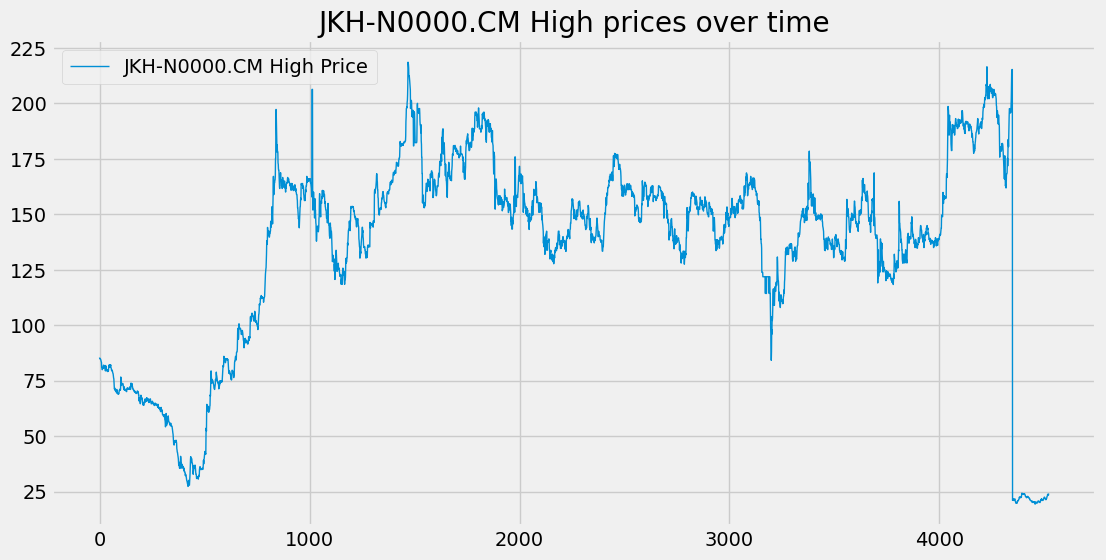

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label=f'{stock} High Price', linewidth=1)
plt.title(f"{stock} High prices over time")
plt.legend()
plt.show()

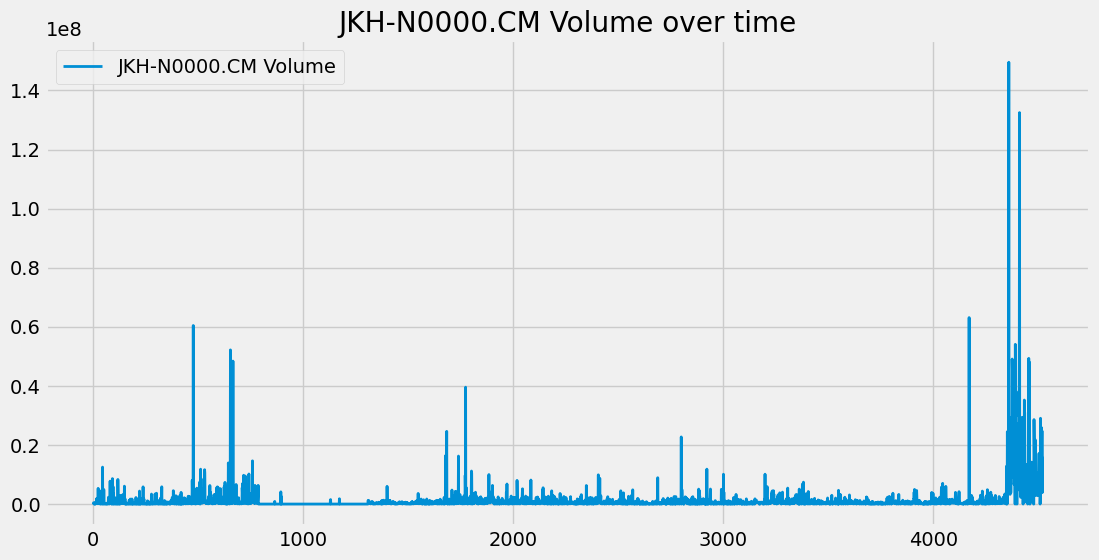

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label=f'{stock} Volume', linewidth=2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [20]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [21]:
import pandas as pd
df1 = pd.DataFrame(temp_data)
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [22]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,JKH-N0000.CM
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4516,21.013170
4517,21.025194
4518,21.034214
4519,21.045239


In [23]:
ma200 = df.Close.rolling(200).mean()


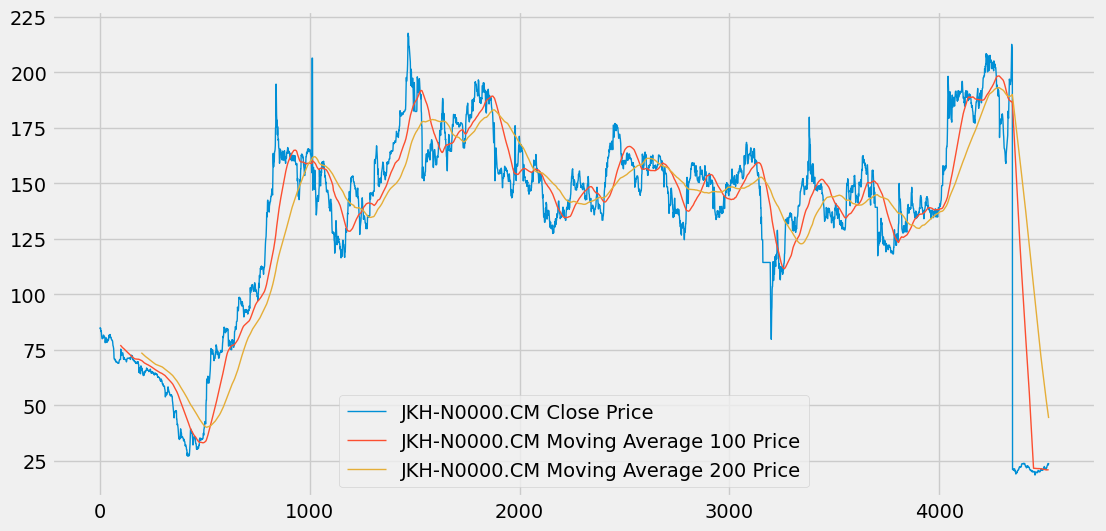

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label=f'{stock} Close Price', linewidth=1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth=1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth=1)
plt.legend()
plt.show()

In [25]:
ema100 = df.Close.ewm(span=100, adjust=False).mean()
ema200 = df.Close.ewm(span=200, adjust=False).mean()

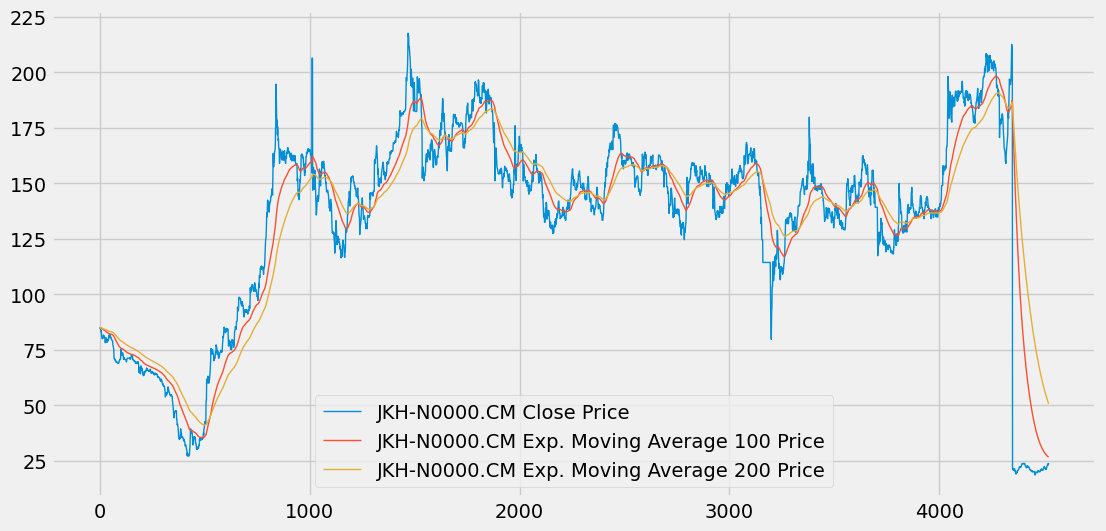

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label=f'{stock} Close Price', linewidth=1)
plt.plot(ema100, label=f'{stock} Exp. Moving Average 100 Price', linewidth=1)
plt.plot(ema200, label=f'{stock} Exp. Moving Average 200 Price', linewidth=1)
plt.legend()
plt.show()

In [27]:
# Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])


In [28]:
data_training.shape

(3164, 1)

In [29]:
data_testing.shape

(1357, 1)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(3164, 1)

In [31]:
X_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  X_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [32]:
X_train.shape

(3064, 100, 1)

In [33]:
# Model building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape= (X_train.shape[1], 1) ))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50)


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 229ms/step - loss: 0.1041
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 254ms/step - loss: 0.0120
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 180ms/step - loss: 0.0105
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - loss: 0.0091
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - loss: 0.0082
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 179ms/step - loss: 0.0074
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - loss: 0.0070
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step - loss: 0.0068
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 180ms/step - loss: 0.0062
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - loss: 0.0061
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 180ms/step - loss: 0.0057
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step - loss: 0.0055
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - loss: 0.0053
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 177ms/step - loss: 0.0049
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [38]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head(3)

Ticker,JKH-N0000.CM
0,152.461243
1,152.461243
2,152.461243


In [39]:
input_data = scaler.fit_transform(final_df)

In [40]:
X_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  X_test.append(input_data[i-100:i])
  y_test.append(input_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)


In [41]:
X_test.shape

(1357, 100, 1)

In [42]:
y_pred = model.predict(X_test)


43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step


In [43]:
y_pred.shape

(1357, 1)

In [44]:
scaler.scale_

array([0.00515793])

In [45]:
scaler_factor = 1/0.00515793
y_pred = y_pred * scaler_factor
y_test = y_test * scaler_factor

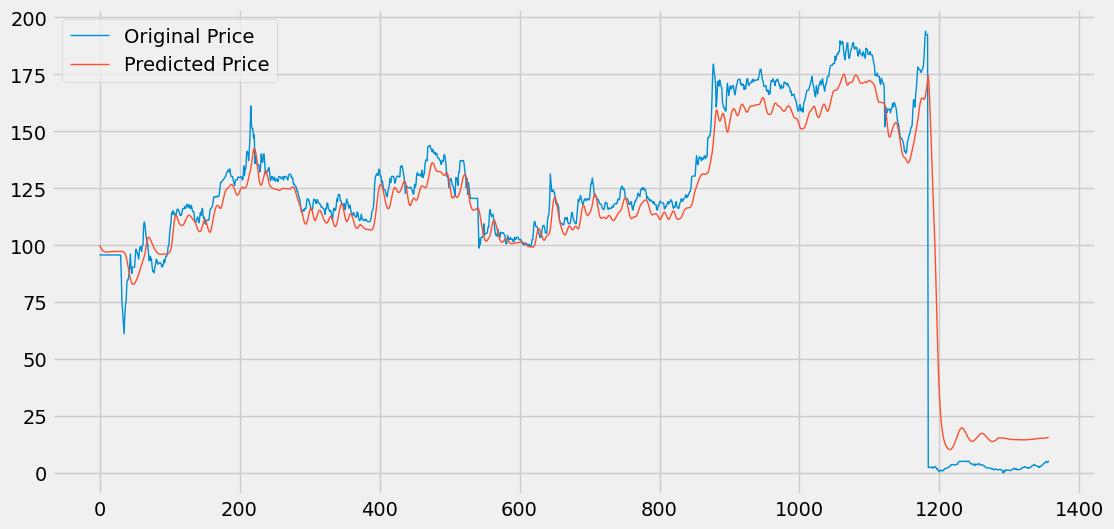

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Original Price', linewidth=1)
plt.plot(y_pred, label='Predicted Price', linewidth=1)
plt.legend()
plt.show()

In [47]:
model.save('stock_jk_model.h5')